# Задание 8

Решить жесткую систему уравнений по явной и неявной схемам Эйлера:

$$\left\{\begin{matrix}
{u}' = 998u + 1998v\\ 
{v}' = -999u - 1999v
\end{matrix}\right.$$

## Жесткая система уравний

**Определение: Система линейных уравнений Au` = f является жесткой, если велико отношение максимального и минимального модуля собственных значений**

$$s = \frac{maxRe(\lambda _k)}{minRe(\lambda _k)}$$


In [1]:
from matplotlib import pyplot as plt
from math import exp

In [2]:
a = 998
b = 1998
c = -999
d = -1999

In [3]:
def f1(x, y):
    return a*x + b*y

def f2(x, y):
    return c*x + d*y

## Аналитическое решение

$$\alpha = (x_0 + y_0)e^{t_0}$$
$$\beta = -1(x_0 - 2 y_0)e^{1000t_0}$$

$$x(t) = 2\alpha e^{-t} + \beta e^{-1000t}$$
$$y(t) = -\beta e^{-1000t} - \alpha e^{-t}$$

In [4]:
def Solution(left, right, N, x_0, y_0):
    left = min(left, right)
    right = max(left, right)
    if N <= 0 :
        print("Incorect number of splits")
        return
    h = (right - left) / N
    x = []
    y = [] 
    t = []
    t.append(left)
    alpha = (x_0 + y_0)*exp(left)
    beta = -1*(x_0+2*y_0)*exp(1000*left)
    x.append(2*alpha*exp(-t[0]) + beta*exp(-1000*t[0]))
    y.append(-beta*exp(-1000*t[0]) - alpha*exp(-t[0]))
    for i in range(0, N):
        t.append(t[i] + h)
        x.append(2*alpha*exp(-t[i]) + beta*exp(-1000*t[i]))
        y.append(-beta*exp(-1000*t[i]) - alpha*exp(-t[i]))
    return x, y, t

## Явный метод Эйлера

### $$y_{i+1} = y_i + hf(x_{i}, y_{i}) $$

In [5]:
def ExplicitEuler(left, right, N, x_0, y_0):
    left = min(left, right)
    right = max(left, right)
    if N <= 0 :
        print("Incorect number of splits")
        return
    h = (right - left) / N
    x = []
    y = []
    t = []
    x.append(x_0)
    y.append(y_0)
    t.append(left)
    for i in range(0, N):
        x.append(x[i] + h * f1(x[i], y[i]))
        y.append(y[i] + h * f2(x[i], y[i]))
        t.append(t[i] + h)
    return x, y, t

## Неявный метод Эйлера

### $$y_{i+1} = y_i + hf(x_{i+1}, y_{i+1})$$

### Метод Крамера

$$\left\{\begin{matrix}
x_{i+1} = x_i + h[ax_{i+1} + by_{i+1}]
\\ 
y_{i+1} = y_i + h[cx_{i+1} + dy_{i+1}]
\end{matrix}\right.$$

$$\left\{\begin{matrix}
(ha-1)x_{i+1} + hby_{i+1} = -x_i
\\ 
hcx_{i+1} + (hd-1)y_{i+1} = -y_i
\end{matrix}\right.$$
__________________________________________

$$\Delta = (1-ha)(1-hd) - h^{2}bc$$

$$\Delta_x =\begin{bmatrix}
-x_i  & hb \\ -y_i
 & (hd - 1)
\end{bmatrix} = (1-hd)x_i + hby_i$$

$$\Delta_x =\begin{bmatrix}
(ha-1)  & -x_i \\ hc
 & -y_i
\end{bmatrix} = (1-ha)y_i + hcx_i$$
____________________________________________

$$\left\{\begin{matrix}
x_{i+1} = \frac{\Delta_x}{\Delta }\\ 
y_{i+1} = \frac{\Delta_y}{\Delta }
\end{matrix}\right.$$

In [6]:
def Kramer(h, x_i, y_i):
    delta = (1 - h*a) * (1 - h*d) - (h*b) * (h*c)
    delta_x = (1 - h*d)*x_i + h*b*y_i
    delta_y = (1 - h*a)*y_i + h*c*x_i
    return delta_x/delta, delta_y/delta

In [7]:
def ImplicitEuler(left, right, N, x_0, y_0):
    left = min(left, right)
    right = max(left, right)
    if N <= 0 :
        print("Incorect number of splits")
        return
    h = (right - left) / N
    x = []
    y = []
    t = []
    x.append(x_0)
    y.append(y_0)
    t.append(left)
    for i in range(0, N):
        x_i, y_i = Kramer(h, x[i], y[i])
        x.append(x_i)
        y.append(y_i)
        t.append(t[i] + h)
    return x, y, t

## Решение

In [8]:
left = 0
right = 1
x_0 = 1
y_0 = 1
lamda = 1000 

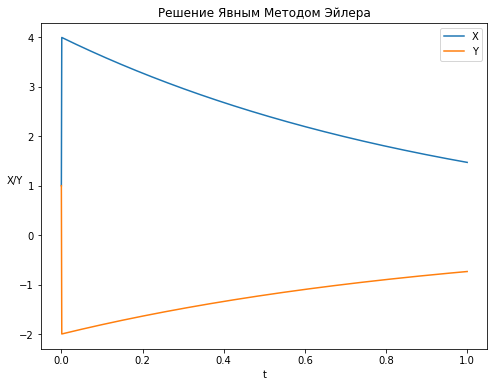

In [32]:
N_expl = 1000
x_exp, y_exp, t_exp =  ExplicitEuler(left, right, N_expl, x_0, y_0)
plt.figure(figsize=(8, 6))
plt.plot(t_exp, x_exp, label='X')
plt.plot(t_exp, y_exp, label='Y')
plt.title('Решение Явным Методом Эйлера')
plt.ylabel('X/Y', rotation=0)
plt.xlabel('t')
plt.legend()
plt.show()

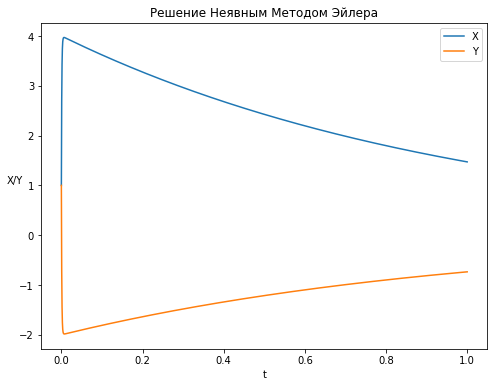

In [10]:
N_impl = 100000
x_imp, y_imp, t_imp =  ImplicitEuler(left, right, N_impl, x_0, y_0)
plt.figure(figsize=(8, 6))
plt.plot(t_imp, x_imp, label='X')
plt.plot(t_imp, y_imp, label='Y')
plt.title('Решение Неявным Методом Эйлера')
plt.ylabel('X/Y', rotation=0)
plt.xlabel('t')
plt.legend()
plt.show()

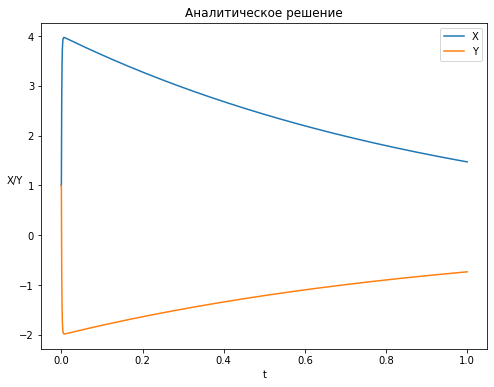

In [11]:
N_sol = 100000
x, y, t = Solution(left, right, N_sol, x_0, y_0)
plt.figure(figsize=(8, 6))
plt.plot(t, x, label='X')
plt.plot(t, y, label='Y')
plt.title('Аналитическое решение')
plt.ylabel('X/Y', rotation=0)
plt.xlabel('t')
plt.legend()
plt.show()

## Графики ошибок

In [12]:
err_exp_x = []
err_exp_y = []
err_imp_x = []
err_imp_y = []
for i in range(0, N_sol+1):
    err_exp_x.append(abs(x_exp[i] - x[i]))
    err_exp_y.append(abs(y_exp[i] - y[i]))
    err_imp_x.append(abs(x_imp[i] - x[i]))
    err_imp_y.append(abs(y_imp[i] - y[i]))

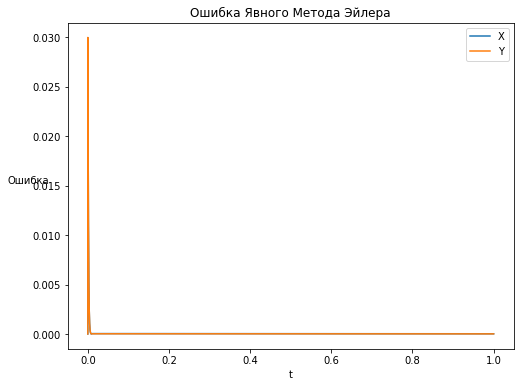

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(t, err_exp_x,  label='X')
plt.plot(t, err_exp_y, label='Y')
plt.title('Ошибка Явного Метода Эйлера')
plt.ylabel('Ошибка', rotation=0)
plt.xlabel('t')
plt.legend()
plt.show()

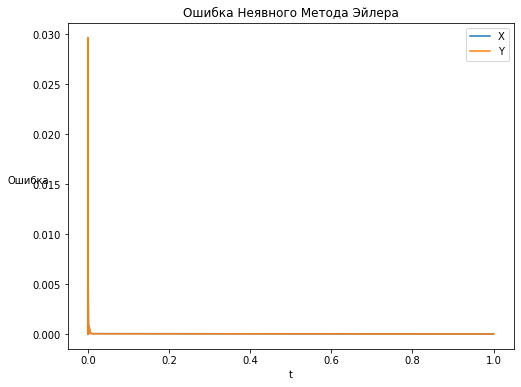

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(t, err_imp_x, label='X')
plt.plot(t, err_imp_y, label='Y')
plt.title('Ошибка Неявного Метода Эйлера')
plt.ylabel('Ошибка', rotation=0)
plt.xlabel('t')
plt.legend()
plt.show()

# Оптимизация ( Алгоритм выбора метода)

$$h < \frac{2}{\lambda} \;\;\;=>\;\;\; \frac{t_N - t_0}{N} < \frac{2}{\lambda}\;\;\; =>\;\;\; N > \frac{\lambda(t_N - t_0)}{2}$$

Согласно формуле выше для усточивого решения достанточно N = 501, но если использовать это для построения решения , не сложно будет убедиться что оно расходиться, поэтом в данном случае лучше взять N = 1000. Замерим за какое время происходит вычисление явным и неявным метод и затем вычилим коэфициент выбора.

In [29]:
N = 1000
%timeit ExplicitEuler(left, right, N, x_0, y_0)

712 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
N = 1000
%timeit ImplicitEuler(left, right, N, x_0, y_0)

935 µs ± 38.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Среднее время выполнения для N = 1000 :
Явным ~ 700 µs
Неявным ~930 µs
Отсюда коэффициент выбора между методами составляет примерно  $$k = \frac{930}{700} = 1.33$$

In [17]:
def optimizer(N):
    #N_extr = lamda*(right - left) / 2
    N_extr = 1000
    if N > N_extr:
        return ExplicitEuler(left, right, N, x_0, y_0)
    if N_extr < 1.33 * N:
        return ExplicitEuler(left, right, N_extr, x_0, y_0)
    else:
        return ImplicitEuler(left, right, N, x_0, y_0)

In [18]:
%timeit optimizer(1000)

705 µs ± 7.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
